## NLP Topic Modeling Exercise

In [1]:
# import TfidfVectorizer and CountVectorizer from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# import fetch_20newsgroups from sklearn.datasets
from sklearn.datasets import fetch_20newsgroups

# import NMF and LatentDirichletAllocation from sklearn
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [2]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

In [8]:
documents[0:2]

["Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n",
 "\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism?  No, you need a little leap

## NMF

* create a variable called `'no_features'` and set its value to 100.

* create a variable `'no_topics'` and set its value to 100

* instantiate a TfidfVectorizer with the following parameters:


    * max_df = 0.95
    * min_df = 2
    * max_features = no_features
    * stop_words = 'english'

* use fit_transform method of TfidfVectorizer to transform the documents

* get the features names from TfidfVectorizer

In [11]:
no_features = 100
no_topics = 100

vectorizer = TfidfVectorizer(
    max_df = .95,
    min_df = 2,
    max_features = no_features,
    stop_words='english'
)

vectors = vectorizer.fit_transform(documents)
features = vectorizer.get_feature_names_out()
features

array(['00', '10', '12', '14', '15', '16', '20', '25', 'a86', 'available',
       'ax', 'b8f', 'believe', 'best', 'better', 'bit', 'case', 'com',
       'come', 'course', 'data', 'day', 'did', 'didn', 'different',
       'does', 'doesn', 'don', 'drive', 'edu', 'fact', 'far', 'file',
       'g9v', 'god', 'going', 'good', 'got', 'government', 'help',
       'information', 'jesus', 'just', 'key', 'know', 'law', 'let',
       'like', 'line', 'list', 'little', 'll', 'long', 'look', 'lot',
       'mail', 'make', 'max', 'mr', 'need', 'new', 'number', 'people',
       'point', 'power', 'probably', 'problem', 'program', 'question',
       'read', 'really', 'right', 'run', 'said', 'say', 'second', 'set',
       'software', 'space', 'state', 'sure', 'tell', 'thanks', 'thing',
       'things', 'think', 'time', 'true', 'try', 'use', 'used', 'using',
       've', 'want', 'way', 'windows', 'work', 'world', 'year', 'years'],
      dtype=object)

In [16]:
print(len(features))
print(vectors.toarray())
print(vectors.toarray().shape)

100
[[0.         0.         0.         ... 0.3540126  0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.18691075 0.3584151 ]]
(11314, 100)


* instantiate NMF and fit transformed data

In [17]:
from sklearn.decomposition import NMF

In [37]:
nmf = NMF(n_components=5)
W = nmf.fit_transform(vectors)
W

array([[0.04311528, 0.00767346, 0.        , 0.0001614 , 0.01017074],
       [0.03391771, 0.03276089, 0.00669244, 0.00197702, 0.04039383],
       [0.02382256, 0.00485776, 0.04661235, 0.        , 0.09254565],
       ...,
       [0.03163245, 0.        , 0.00205343, 0.        , 0.11179879],
       [0.        , 0.10446323, 0.        , 0.        , 0.        ],
       [0.04549498, 0.03602397, 0.01113797, 0.00078211, 0.07667187]])

In [38]:
print(W.shape) # Same shape as input vectors
H = nmf.components_
print(H.shape) # Number of rows is equal to n_components. If `n_components` parameter is not passed when .NMF is instantiated, shape will be square with each dimension being same as # of input columns
H

(11314, 5)
(5, 100)


array([[0.00000000e+00, 1.53130768e-01, 1.22619493e-01, 5.59777271e-02,
        1.07719088e-01, 8.78378568e-03, 1.57092615e-01, 2.70825492e-02,
        0.00000000e+00, 3.28406555e-02, 0.00000000e+00, 0.00000000e+00,
        9.88914854e-01, 3.97540274e-01, 6.33161026e-01, 1.83893879e-01,
        5.55414960e-01, 1.30164066e-01, 6.07440150e-01, 5.80970520e-01,
        0.00000000e+00, 4.43820552e-01, 1.16330357e+00, 6.27110227e-01,
        3.81564311e-01, 0.00000000e+00, 3.86381962e-01, 2.65096706e+00,
        0.00000000e+00, 0.00000000e+00, 6.64013652e-01, 4.79800406e-01,
        0.00000000e+00, 0.00000000e+00, 1.28931494e+00, 6.93228046e-01,
        1.28388194e+00, 3.51966532e-01, 8.30230112e-01, 5.61233469e-02,
        0.00000000e+00, 5.04674382e-01, 0.00000000e+00, 5.30857729e-02,
        6.80023352e-01, 5.12818542e-01, 6.08019136e-01, 0.00000000e+00,
        1.18152151e-01, 7.94528634e-02, 4.41137835e-01, 5.26516144e-01,
        5.32333585e-01, 3.73080892e-01, 4.66886130e-01, 0.000000

## LDA w/ Sklearn

* instantiate a CountVectorizer with following parameters:


    * max_df = 0.95
    * min_df = 2
    * max_features = no_features
    * stop_words = 'english'

* use fit_transform method of CountVectorizer to transform documents

* get the features names from TfidfVectorizer

In [23]:
cvectorizer = CountVectorizer(
    max_df = 0.95,
    min_df = 2,
    max_features = no_features,
    stop_words = 'english'
)
cvectors = cvectorizer.fit_transform(documents)

In [25]:
cvectorizer.vocabulary_

{'sure': 80,
 'did': 22,
 'world': 97,
 'try': 88,
 'think': 85,
 'government': 38,
 'look': 53,
 'got': 37,
 'power': 64,
 'people': 62,
 'read': 69,
 'need': 59,
 'little': 50,
 'just': 42,
 'new': 60,
 'don': 27,
 'like': 47,
 'know': 44,
 'question': 68,
 'want': 93,
 'work': 96,
 'key': 43,
 'drive': 28,
 'use': 89,
 'going': 35,
 'probably': 65,
 'doesn': 26,
 'year': 98,
 'line': 48,
 'time': 86,
 'right': 71,
 'does': 25,
 'll': 51,
 'good': 36,
 'let': 46,
 'mail': 55,
 'edu': 29,
 'jesus': 41,
 'day': 21,
 'lot': 54,
 '20': 6,
 '25': 7,
 'better': 14,
 'file': 32,
 'mr': 58,
 'say': 74,
 'make': 56,
 'way': 94,
 '10': 1,
 'years': 99,
 'used': 90,
 'tell': 81,
 'thanks': 82,
 'list': 49,
 'available': 9,
 'help': 39,
 'information': 40,
 'software': 77,
 'data': 20,
 '12': 2,
 '14': 3,
 '15': 4,
 'space': 78,
 '16': 5,
 'com': 17,
 'number': 61,
 'things': 84,
 'run': 72,
 'program': 67,
 'set': 76,
 'windows': 95,
 'bit': 15,
 'best': 13,
 'state': 79,
 'course': 19,
 'diffe

In [27]:
cfeatures = cvectorizer.get_feature_names_out()
cfeatures

array(['00', '10', '12', '14', '15', '16', '20', '25', 'a86', 'available',
       'ax', 'b8f', 'believe', 'best', 'better', 'bit', 'case', 'com',
       'come', 'course', 'data', 'day', 'did', 'didn', 'different',
       'does', 'doesn', 'don', 'drive', 'edu', 'fact', 'far', 'file',
       'g9v', 'god', 'going', 'good', 'got', 'government', 'help',
       'information', 'jesus', 'just', 'key', 'know', 'law', 'let',
       'like', 'line', 'list', 'little', 'll', 'long', 'look', 'lot',
       'mail', 'make', 'max', 'mr', 'need', 'new', 'number', 'people',
       'point', 'power', 'probably', 'problem', 'program', 'question',
       'read', 'really', 'right', 'run', 'said', 'say', 'second', 'set',
       'software', 'space', 'state', 'sure', 'tell', 'thanks', 'thing',
       'things', 'think', 'time', 'true', 'try', 'use', 'used', 'using',
       've', 'want', 'way', 'windows', 'work', 'world', 'year', 'years'],
      dtype=object)

* instantiate LatentDirichletAllocation and fit transformed data 

In [31]:
lda = LatentDirichletAllocation()
n_topics = 5
lda = LatentDirichletAllocation(n_components=n_topics, 
                                max_iter=5,
                                learning_method='online',
                                random_state=0)
lda.fit_transform(cvectors)


array([[0.02      , 0.02016189, 0.74108382, 0.0204752 , 0.19827909],
       [0.02222223, 0.02281769, 0.79193103, 0.0224915 , 0.14053754],
       [0.02222222, 0.02254239, 0.91055424, 0.02237773, 0.02230342],
       ...,
       [0.06666667, 0.06741207, 0.73192547, 0.067281  , 0.06671479],
       [0.04000001, 0.83800116, 0.04116495, 0.0402144 , 0.04061948],
       [0.00800019, 0.00810907, 0.84715264, 0.00816399, 0.12857411]])

* create a function `display_topics` that is able to display the top words in a topic for different models

* display top 10 words from each topic from LDA model

In [32]:
lda.components_

array([[2.78061616e-01, 4.82699394e+00, 5.42106606e+00, 1.44214495e+02,
        5.89371439e+00, 1.37342952e+00, 1.18585943e+00, 5.12466797e+01,
        1.15965458e+03, 2.10447706e-01, 6.33230357e+04, 1.41736790e+03,
        2.00005857e-01, 2.00545340e-01, 2.00225343e-01, 2.03190260e-01,
        2.00028859e-01, 2.14565021e-01, 2.00237008e-01, 2.00261542e-01,
        2.08827609e-01, 2.01817745e-01, 2.00136405e-01, 2.00007505e-01,
        2.00251458e-01, 2.02282011e-01, 2.00140225e-01, 2.00443332e-01,
        2.00379391e-01, 2.28208546e-01, 2.00023153e-01, 2.00391778e-01,
        2.11980937e-01, 1.22009680e+03, 2.00002857e-01, 2.00007557e-01,
        2.00735489e-01, 2.00194557e-01, 2.00133401e-01, 2.03116049e-01,
        2.15023963e-01, 2.00004415e-01, 2.00448046e-01, 2.00361972e-01,
        2.00344910e-01, 2.00003940e-01, 2.00694018e-01, 2.02418880e-01,
        2.02861460e-01, 2.09702042e-01, 2.00540877e-01, 9.09693677e+00,
        2.01112391e-01, 2.02083550e-01, 2.00230460e-01, 2.099790

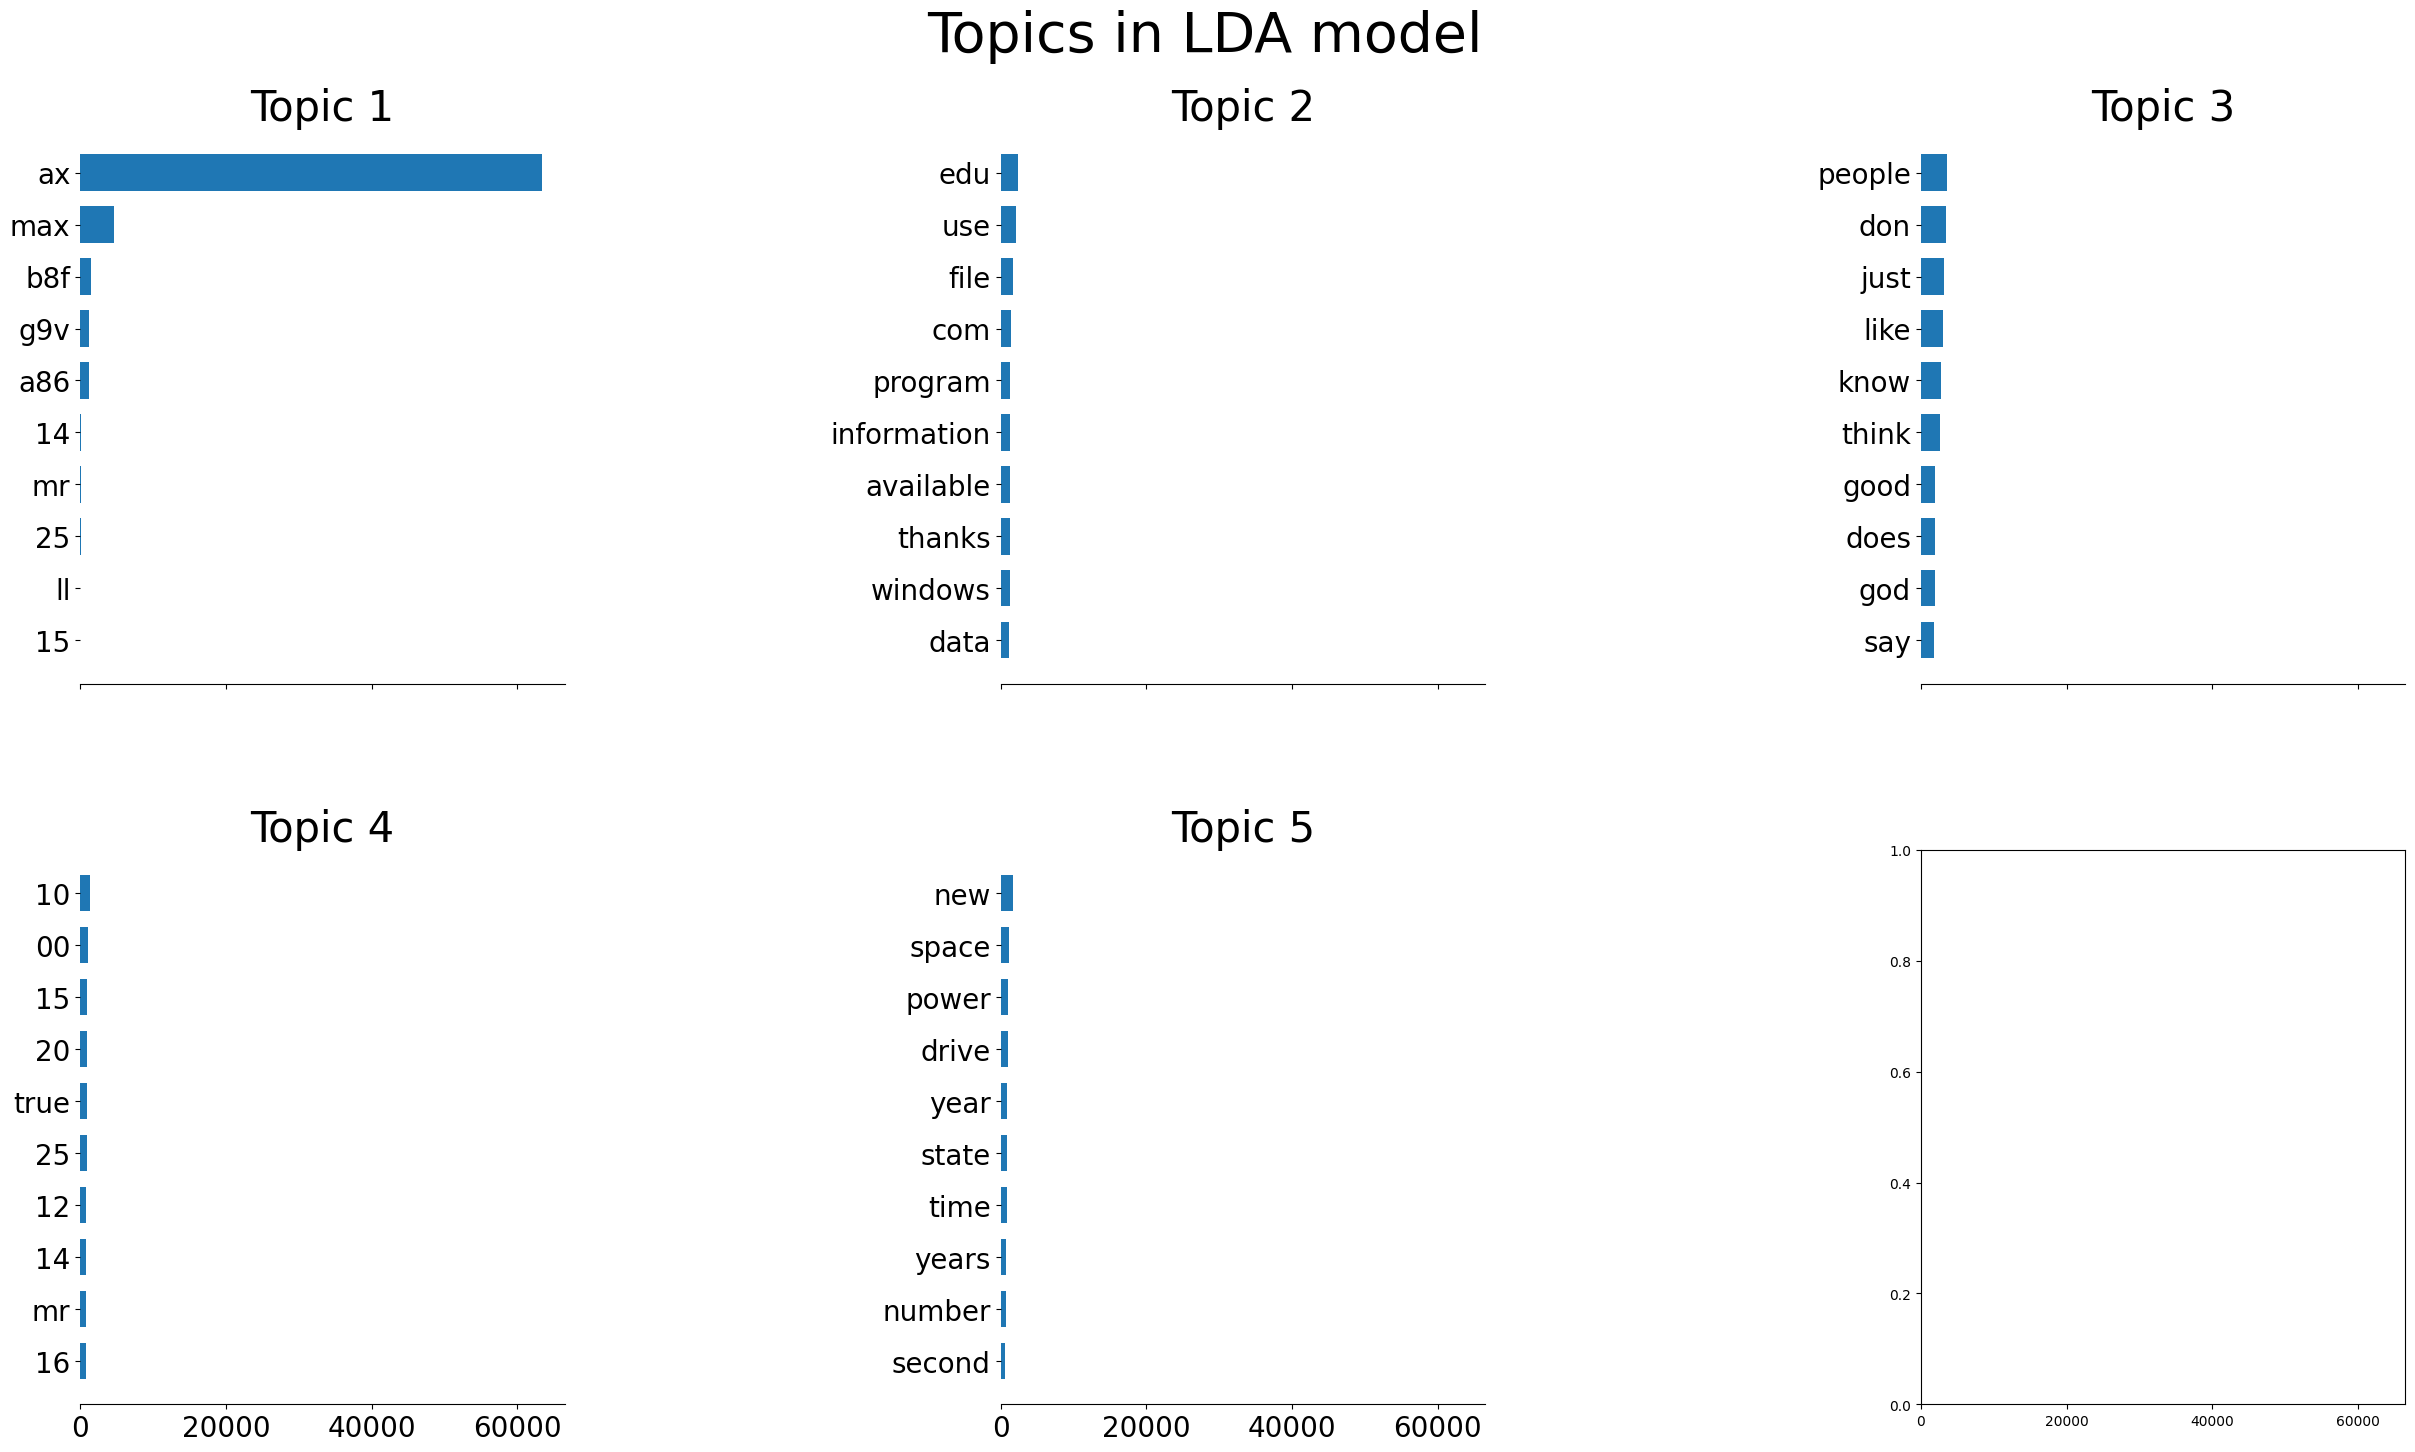

In [35]:
from matplotlib import pyplot as plt
def display_topics(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, round((n_topics+.5)/2), figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic_components in enumerate(model.components_): # components_[i, j] can be viewed as pseudocount that represents the number of times word j was assigned to topic i
        top_features_ind = topic_components.argsort()[:-n_top_words - 1:-1] # Get the top n_top_words, then put then in reverse order
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic_components[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    
display_topics(lda, cfeatures, 10, 'Topics in LDA model')

* display top 10 words from each topic from NMF model

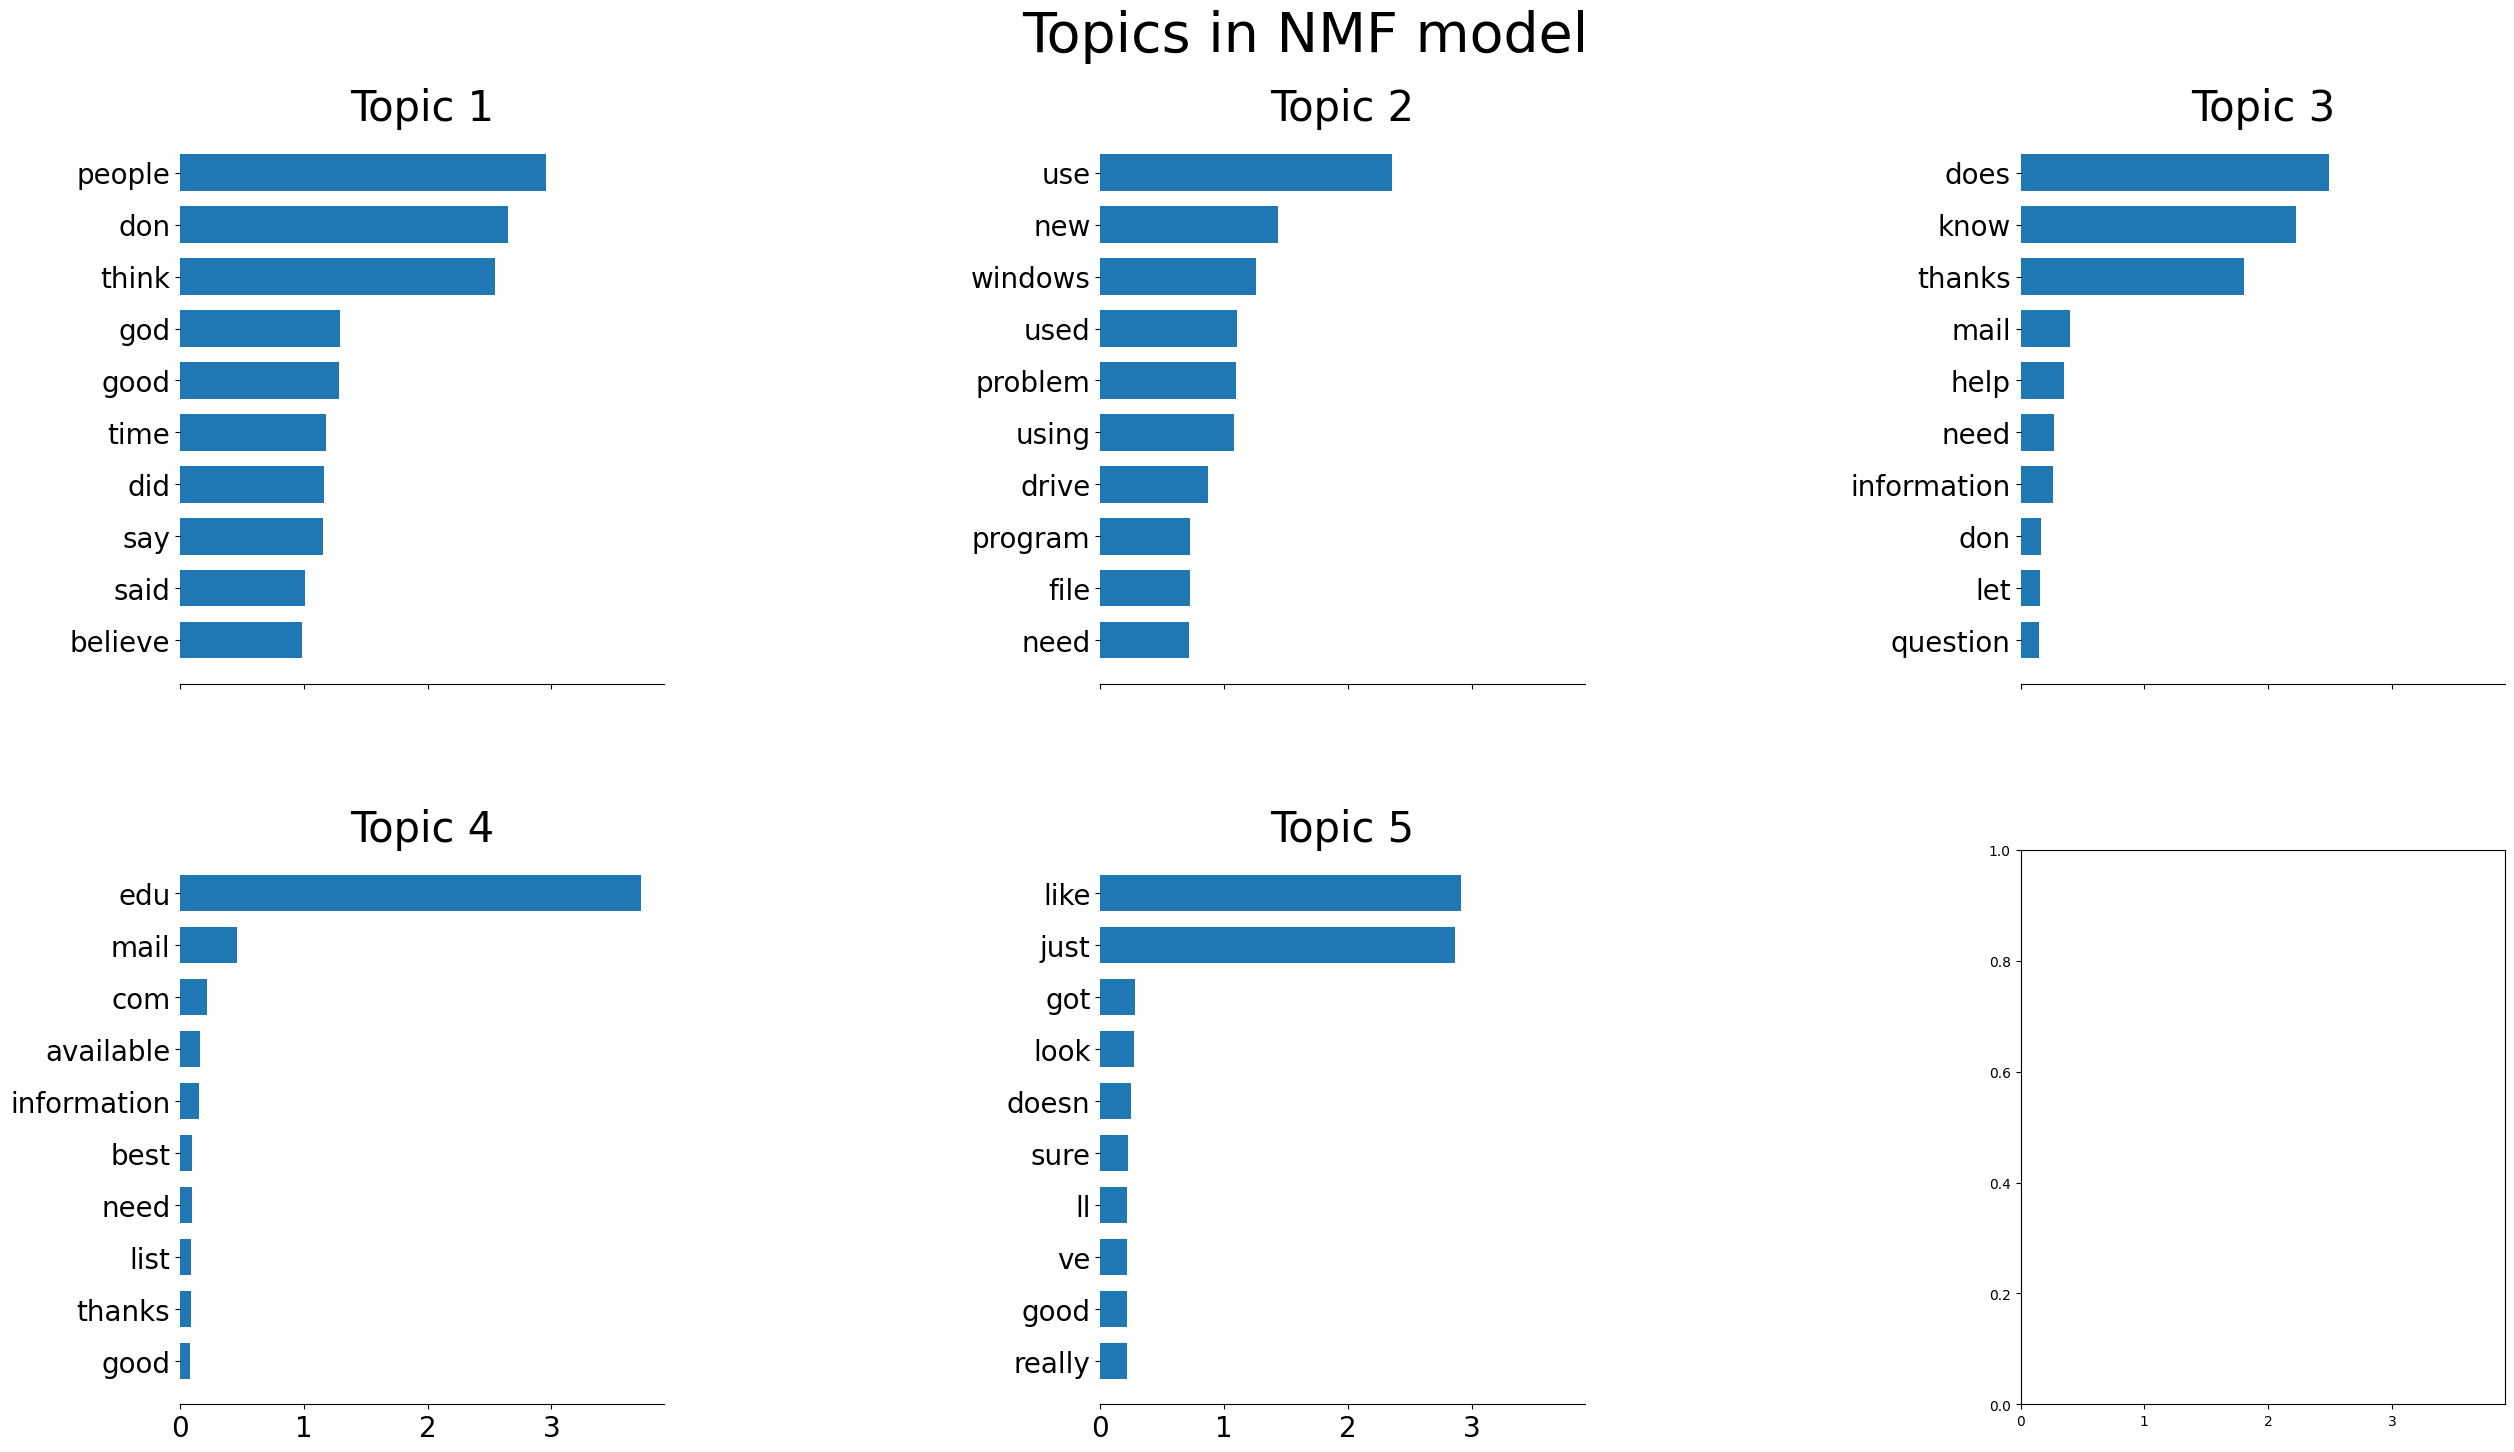

In [39]:
display_topics(nmf, features, 10, 'Topics in NMF model')

### Stretch: Use LDA w/ Gensim to do the same thing.